In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics


#### Read ALL Life Credit Card information from the Excel and load into "all_life_cc_df" Dataframe

In [2]:

all_life_cc_df = pd.read_excel("F:\\UTA-ML\\Unsupervised Learning - Project\\Credit Card Customer Data.xlsx")
all_life_cc_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


##### Get the Information about the Data Frame - column names, data type, #of Records, #of Non-Null Records

In [3]:
all_life_cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


###### Get the Data frame shape - No of Rows and No of Columns

In [4]:
all_life_cc_df.shape 

(660, 7)

###### Checking if Any columns has Nulls ( using function). as per above informatoin no feature has NULL values.

In [5]:
all_life_cc_df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

###### Checking if Any columns has NAs 

In [6]:
all_life_cc_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

###### Get 5Point Summary 

In [7]:
all_life_cc_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


##### create box plots for all the features

In [8]:
all_life_cc_df.columns  

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce5a3adfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce5a3bdfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce5a32f988>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce5a3bf888>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce5a3be448>],
 'means': []}

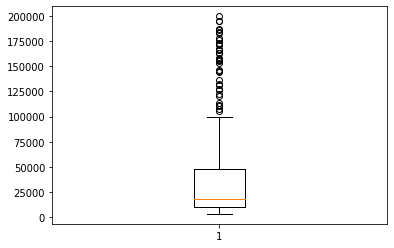

In [9]:
plt.boxplot(all_life_cc_df['Avg_Credit_Limit'])    

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce5ab73808>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce5abc2dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce5abbbb08>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce5abc2f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce5abc7ec8>],
 'means': []}

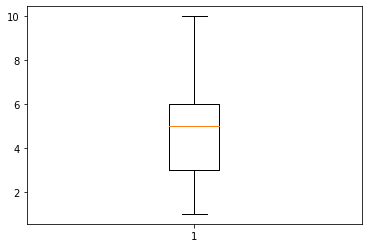

In [10]:
plt.boxplot(all_life_cc_df['Total_Credit_Cards'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce5abe04c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce5ac27f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce5ac27288>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce5ac2bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce5ac2bb08>],
 'means': []}

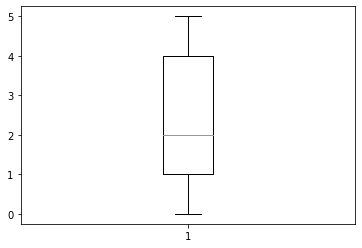

In [11]:
plt.boxplot(all_life_cc_df['Total_visits_bank'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce5a359608>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce5a3e4948>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce5a35e5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce5a3dcb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce5a3d4288>],
 'means': []}

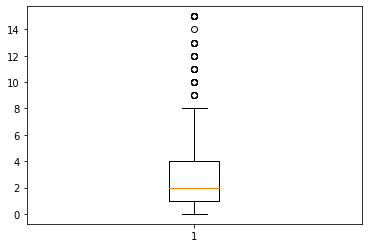

In [12]:
plt.boxplot(all_life_cc_df['Total_visits_online'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ce5a3bafc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce5a3b7408>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce5a3bae48>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce5a3a7588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce5a3a0ec8>],
 'means': []}

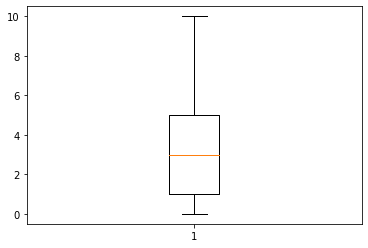

In [13]:
plt.boxplot(all_life_cc_df['Total_calls_made'])

##### From Above Analysis below are the Key points on the input data.

 - There are 7 Columns and 660 rows of data is available for analysis
 - all the features are Numerical, not Null 
 - There is no data missing(Null or NA) in any of these columns
 - Sl_No is a unique identifier /counter in each row
 - Customer Key is unique value assinged to each customer for identification.
 - To group this data into clusters, Sl_No and Customer Key columns can be dropped.
 - There are outliers Avg_Credit_Limit and Total_visits_online. need to check if the Log function is of any use here
 - Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made are ranging between 0 and 15 where as Credit Limit    ranges between 3000 to 200000. so we need to scale the data, after applying log.


In [14]:
all_life_cc_df['Avg_Credit_Limit'] = np.log(all_life_cc_df['Avg_Credit_Limit'])

###### Dropping the first two columns(Sl_No, Customer Key) and Apply ZSCORE scaling techinque on the columns

In [15]:
all_life_cc_df_req=all_life_cc_df.iloc[:,2:].apply(zscore)
all_life_cc_df_req

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537
1,0.885387,-0.787585,-1.473731,2.520519,1.891859
2,0.885387,1.058973,-0.860451,0.134290,0.145528
3,0.336281,0.135694,-0.860451,-0.547490,0.145528
4,1.630478,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.619674,2.443892,-0.860451,2.520519,-1.251537
656,1.443058,2.443892,-0.860451,3.543188,-0.553005
657,2.029885,1.520613,-0.860451,2.179629,-0.902271
658,2.213443,2.443892,-0.860451,4.224968,-1.251537


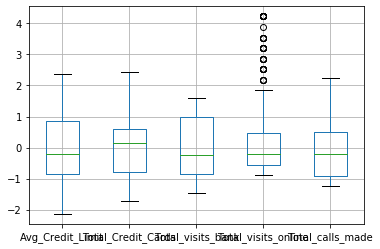

In [16]:
all_life_cc_df_req.boxplot()

In [17]:
all_life_cc_df_req.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537
1,0.885387,-0.787585,-1.473731,2.520519,1.891859
2,0.885387,1.058973,-0.860451,0.134290,0.145528
3,0.336281,0.135694,-0.860451,-0.547490,0.145528
4,1.630478,0.597334,-1.473731,3.202298,-0.203739


##### Find the Correlation between the features

In [18]:
all_life_cc_df_req.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.586243,0.073937,0.292976,-0.466308
Total_Credit_Cards,0.586243,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.073937,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.292976,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.466308,-0.651251,-0.506016,0.127299,1.000000


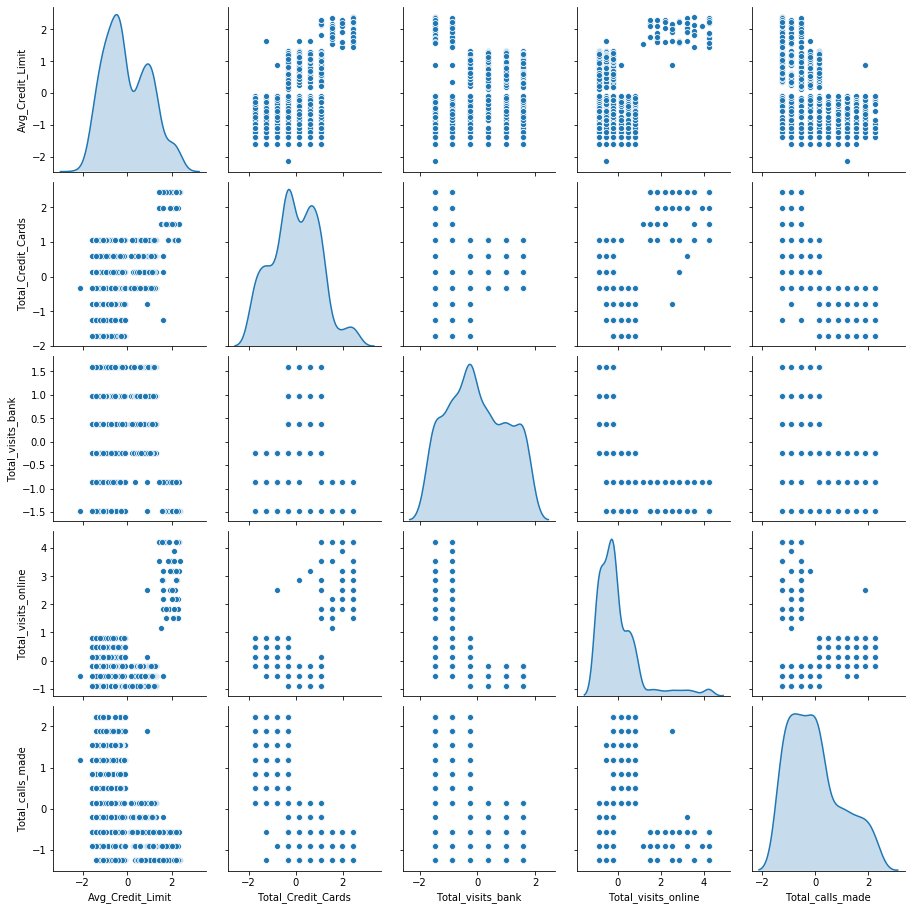

In [19]:
sns.pairplot(all_life_cc_df_req,diag_kind='kde')

##### There is no strong correlation between the features so no feature can be dropped
##### Based on the kde plots, we can work with 3 or 4 clusters


## K-Means

In [20]:
from sklearn.cluster import KMeans

1 2.0713315285283365
2 1.5081573486105375
3 1.239908043607501
4 1.10532217607964
5 1.045441399784538
6 0.9924585542641369
7 0.9471583556574198
8 0.9235498322548228
9 0.9016805297596094


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

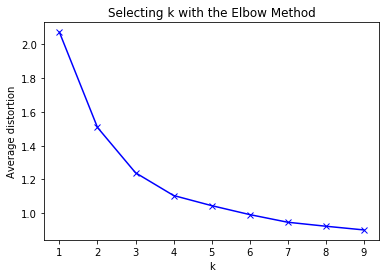

In [21]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(all_life_cc_df_req)
    prediction=model.predict(all_life_cc_df_req)
    meanDistortions.append(sum(np.min(cdist(all_life_cc_df_req, model.cluster_centers_, 'euclidean'), axis=1)) / all_life_cc_df_req.shape[0])
    print (k,meanDistortions[-1])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### based on Elbow method and Calculted distortions, lets try with 3,4,5,6 Clusters

In [22]:
# Let us try with K = 3
final_model=KMeans(3)
final_model.fit(all_life_cc_df_req)
prediction=final_model.predict(all_life_cc_df_req)

#Append the prediction 
all_life_cc_df["GROUP"] = prediction
all_life_cc_df_req["GROUP"] = prediction
print("Groups Assigned : \n")
all_life_cc_df_req.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,1
2,0.885387,1.058973,-0.860451,0.134290,0.145528,0
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,0
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.099569,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.630478,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.408809,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-1.589750,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-2.138856,-0.325946,-1.473731,-0.547490,1.193326,1


In [23]:
all_life_cc_df_req['GROUP'].value_counts()

0    385
1    225
2     50
Name: GROUP, dtype: int64

In [24]:
all_life_cc_df_req.groupby(['GROUP']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,0.171814,0.374308,0.668767,-0.554573,-0.554819
1,-0.730991,-1.054310,-0.898610,0.320643,1.143653
2,1.966490,1.862226,-1.105763,2.827319,-0.874330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE5D377208>,
      dtype=object)

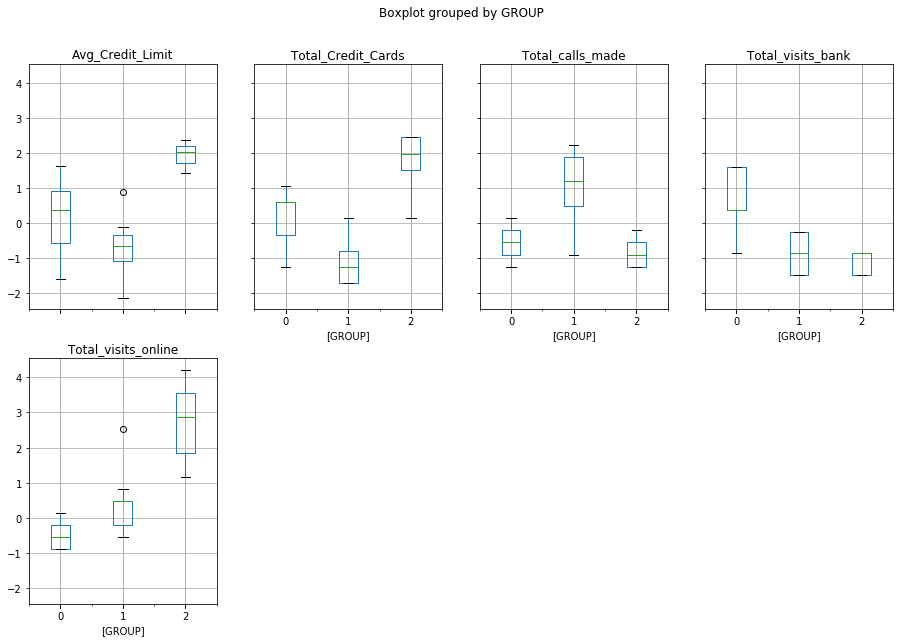

In [25]:
all_life_cc_df_req.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#####  Group 0 is characterized by low Avg Credit Limit, Less Credit Cards,low visits to bank but these customers interacted with bank through online and calls
#####  Group 1 is characterized by  medium Avg Credit Limit and  Credit Cards, but these customers visited banks the highest
#####  Group 2 is characterized by  hightest AvtgCredit Limit ,  Credit Cards and viisted Bank in online. These customers bank visits the calls made are not the highest


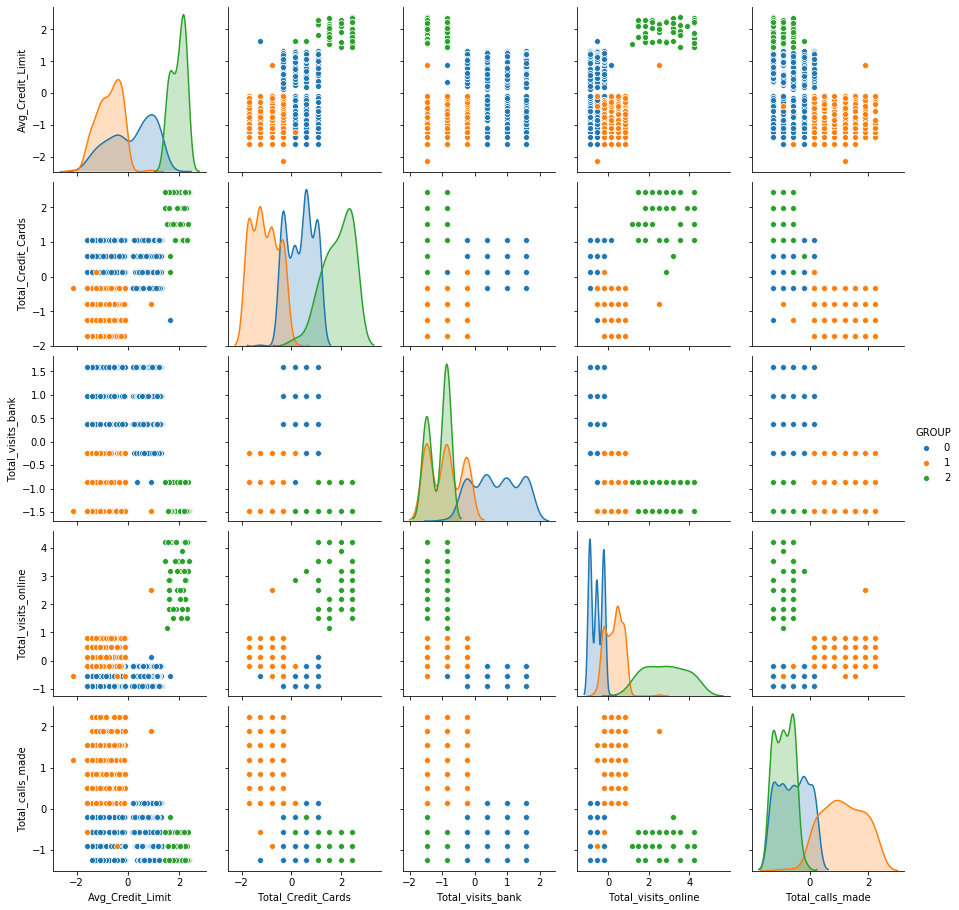

In [26]:
sns.pairplot(all_life_cc_df_req,hue="GROUP")

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,prediction)

0.5176314877137097

In [28]:
all_life_cc_df=all_life_cc_df.drop(columns=["GROUP"])

all_life_cc_df_req=all_life_cc_df_req.drop(['GROUP'], axis=1)

In [29]:
# Let us try with K = 4
final_model=KMeans(4)
final_model.fit(all_life_cc_df_req)
prediction=final_model.predict(all_life_cc_df_req)

#Append the prediction 
all_life_cc_df["GROUP"] = prediction
all_life_cc_df_req["GROUP"] = prediction
print("Groups Assigned : \n")
all_life_cc_df_req.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,0
2,0.885387,1.058973,-0.860451,0.134290,0.145528,3
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,3
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.099569,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.630478,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.408809,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-1.589750,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-2.138856,-0.325946,-1.473731,-0.547490,1.193326,0


In [30]:
all_life_cc_df_req['GROUP'].value_counts()

0    223
3    219
1    168
2     50
Name: GROUP, dtype: int64

In [31]:
all_life_cc_df_req.groupby(['GROUP']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.726532,-1.062913,-0.904453,0.325372,1.152605
1,-0.714454,0.350027,0.731157,-0.545461,-0.573795
2,1.966490,1.862226,-1.105763,2.827319,-0.874330
3,0.838906,0.388647,0.612542,-0.558386,-0.533867


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE5E7668C8>,
      dtype=object)

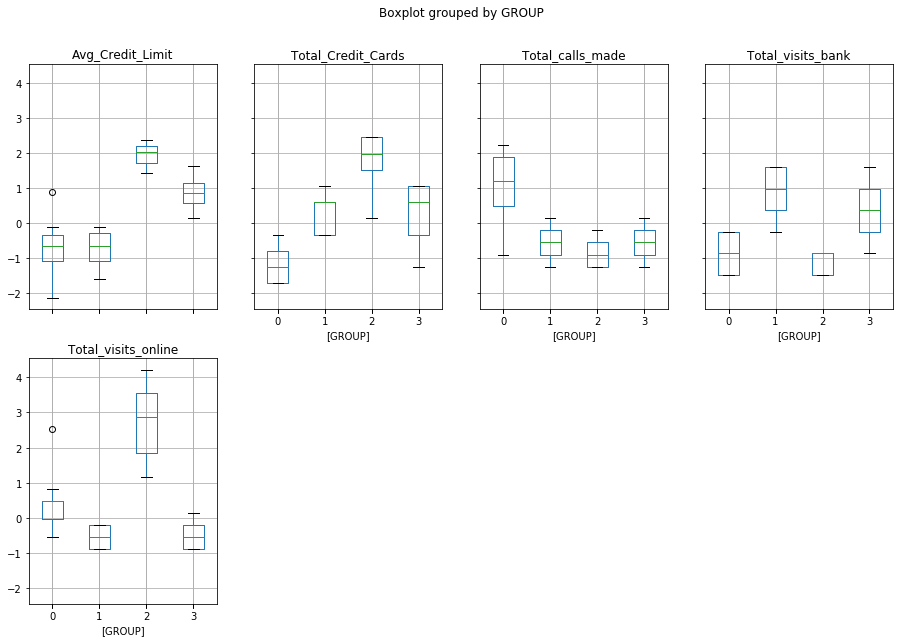

In [32]:
all_life_cc_df_req.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#####  Group 0 is characterized by highest Avg Credit Limit,  Credit Cards,low visits to bank but these customers interacted with bank through very less thorough online , calls. 
#####  Group 1 is characterized by high Avg Credit Limit and  Credit Cards, but these customers interacted with bank through onine mostly the highest
#####  Group 2 is characterized by low  Avg Credit Limit. Total visits to bank are the hightest 
#####  Group 3 is characterized by  hightest  numbers of calls made to bank

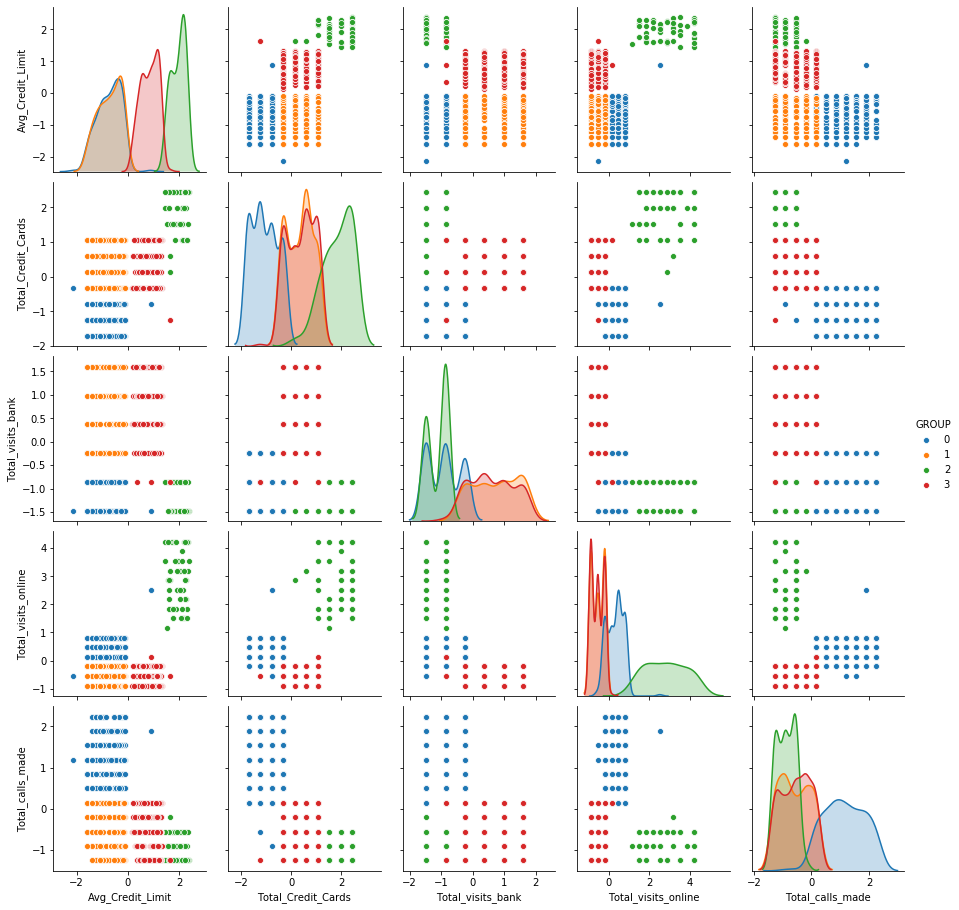

In [33]:
sns.pairplot(all_life_cc_df_req,hue="GROUP")

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,prediction)

0.510369567232456

In [35]:
all_life_cc_df=all_life_cc_df.drop(columns=["GROUP"])

all_life_cc_df_req=all_life_cc_df_req.drop(['GROUP'], axis=1)


In [36]:
# Let us try with K = 5
final_model=KMeans(5)
final_model.fit(all_life_cc_df_req)
prediction=final_model.predict(all_life_cc_df_req)
prediction
#Append the prediction 
all_life_cc_df["GROUP"] = prediction
all_life_cc_df_req["GROUP"] = prediction
print("Groups Assigned : \n")
all_life_cc_df_req.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,4
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,1
2,0.885387,1.058973,-0.860451,0.134290,0.145528,4
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,4
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,3
5,-0.099569,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.630478,0.135694,-1.473731,2.861408,-0.553005,3
7,-0.408809,-0.787585,-1.473731,-0.547490,-0.902271,4
8,-1.589750,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-2.138856,-0.325946,-1.473731,-0.547490,1.193326,1


In [37]:
all_life_cc_df_req['GROUP'].value_counts()

1    222
2    149
4    135
0    104
3     50
Name: GROUP, dtype: int64

In [38]:
all_life_cc_df_req.groupby(['GROUP']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,0.767712,0.410902,1.286030,-0.560601,-0.569797
1,-0.727964,-1.064153,-0.901888,0.329303,1.161861
2,-0.781187,0.355670,0.806519,-0.547490,-0.562381
3,1.966490,1.862226,-1.105763,2.827319,-0.874330
4,0.739542,0.351126,0.011770,-0.552540,-0.527133


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE61EB7848>,
      dtype=object)

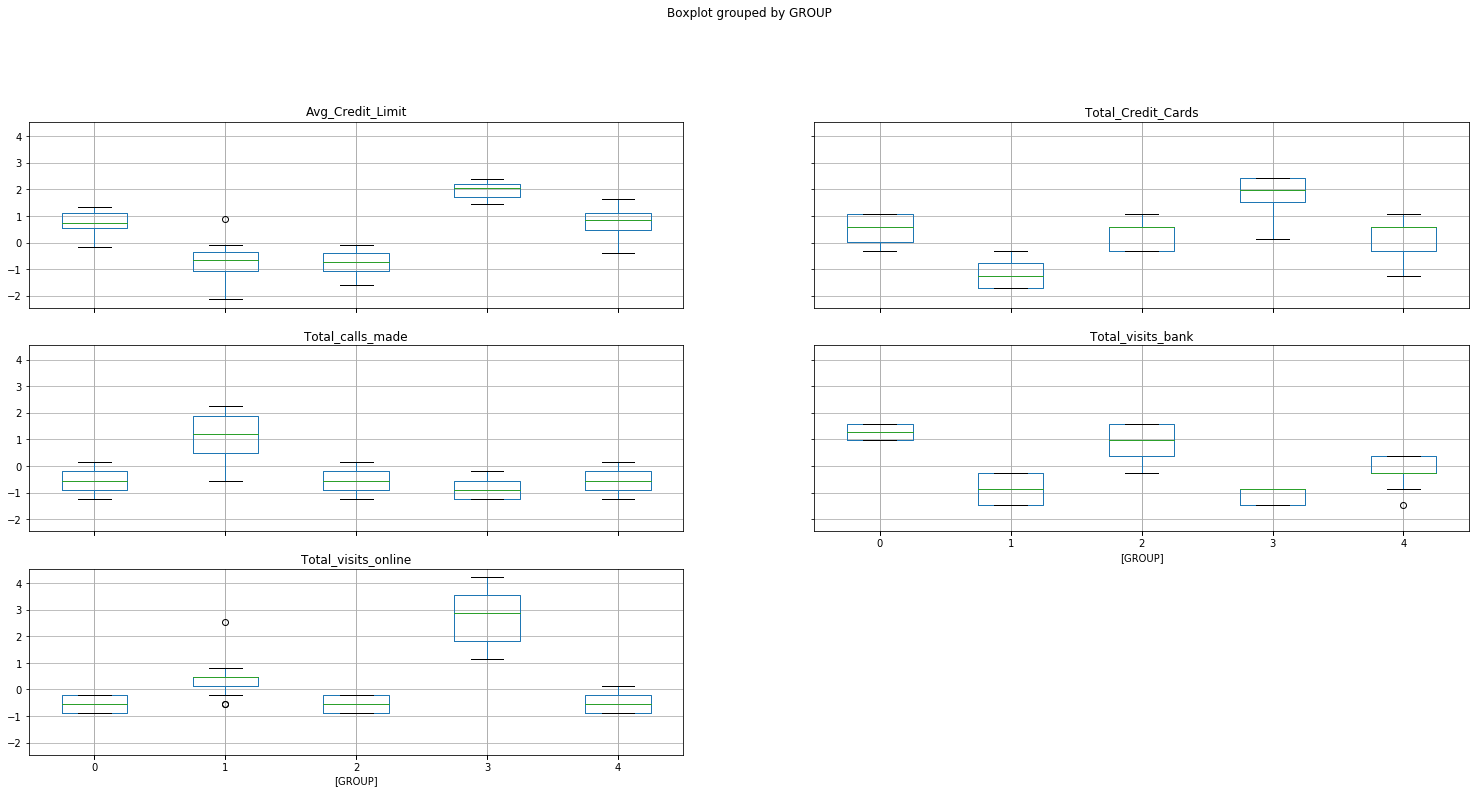

In [39]:
all_life_cc_df_req.boxplot(by='GROUP', layout = (5,2),figsize=(25,20))

#####  Group 0 is characterized by highest Avg Credit Limit,  Credit Cards, highest visits to bank in online . 
#####  Group 1 is characterized by high Avg Credit Limit and  Credit Cards, but these customers interacted with bank through onine mostly the highest
#####  Group 2 is characterized by low  Avg Credit Limit. Total visits to bank are the hightest 
#####  Group 3 is characterized by  hightest  numbers of calls made to bank

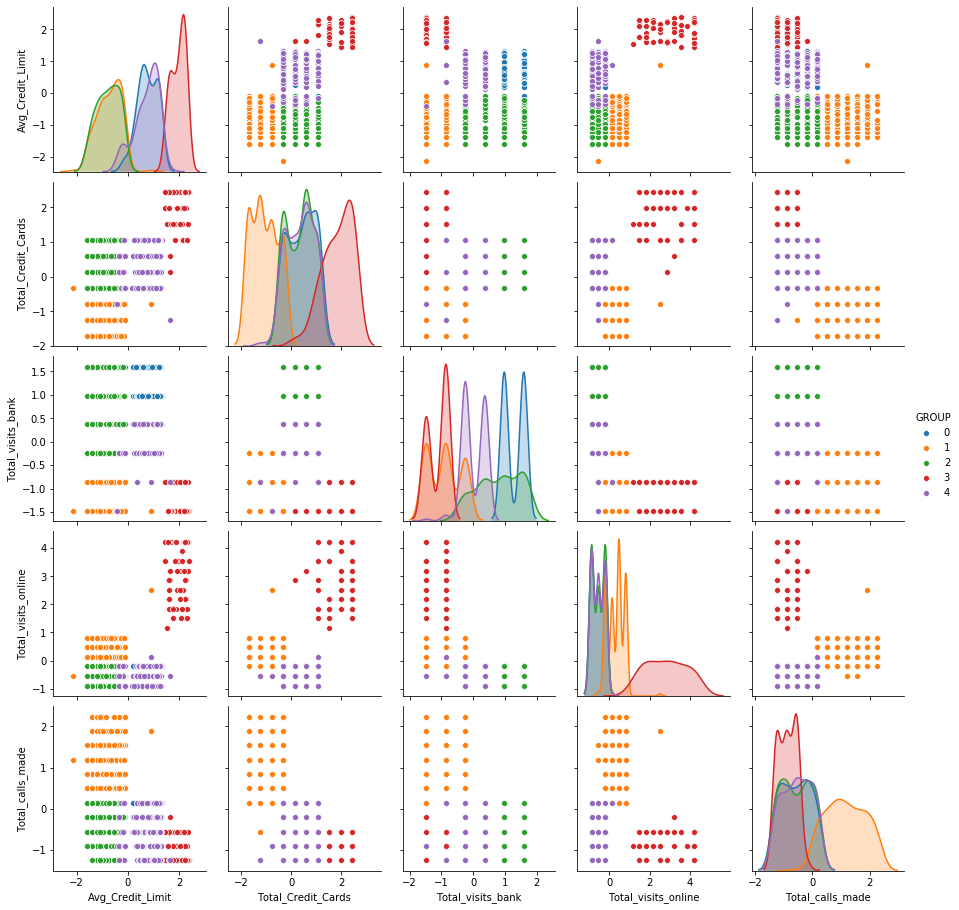

In [40]:
sns.pairplot(all_life_cc_df_req,hue="GROUP")

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,prediction)

0.5333413344257081

In [42]:
all_life_cc_df=all_life_cc_df.drop(columns=["GROUP"])

all_life_cc_df_req=all_life_cc_df_req.drop(['GROUP'], axis=1)


In [43]:
# Let us try with K = 6
final_model=KMeans(6)
final_model.fit(all_life_cc_df_req)
prediction=final_model.predict(all_life_cc_df_req)
prediction
#Append the prediction 
all_life_cc_df["GROUP"] = prediction
all_life_cc_df_req["GROUP"] = prediction
print("Groups Assigned : \n")
all_life_cc_df_req.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,5
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,0
2,0.885387,1.058973,-0.860451,0.134290,0.145528,5
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,5
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.099569,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.630478,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.408809,-0.787585,-1.473731,-0.547490,-0.902271,3
8,-1.589750,-1.249225,-1.473731,-0.206600,-0.553005,3
9,-2.138856,-0.325946,-1.473731,-0.547490,1.193326,3


In [44]:
all_life_cc_df_req['GROUP'].value_counts()

4    150
5    132
3    118
0    106
1    104
2     50
Name: GROUP, dtype: int64

In [45]:
all_life_cc_df_req.groupby(['GROUP']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.668306,-1.048891,-0.999307,0.381917,1.760060
1,0.767712,0.410902,1.286030,-0.560601,-0.569797
2,1.966490,1.862226,-1.105763,2.827319,-0.874330
3,-0.783088,-1.069264,-0.813675,0.270068,0.598390
4,-0.772318,0.357281,0.799494,-0.549762,-0.573961
5,0.764590,0.363017,0.026947,-0.552655,-0.515961


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE63C60108>,
      dtype=object)

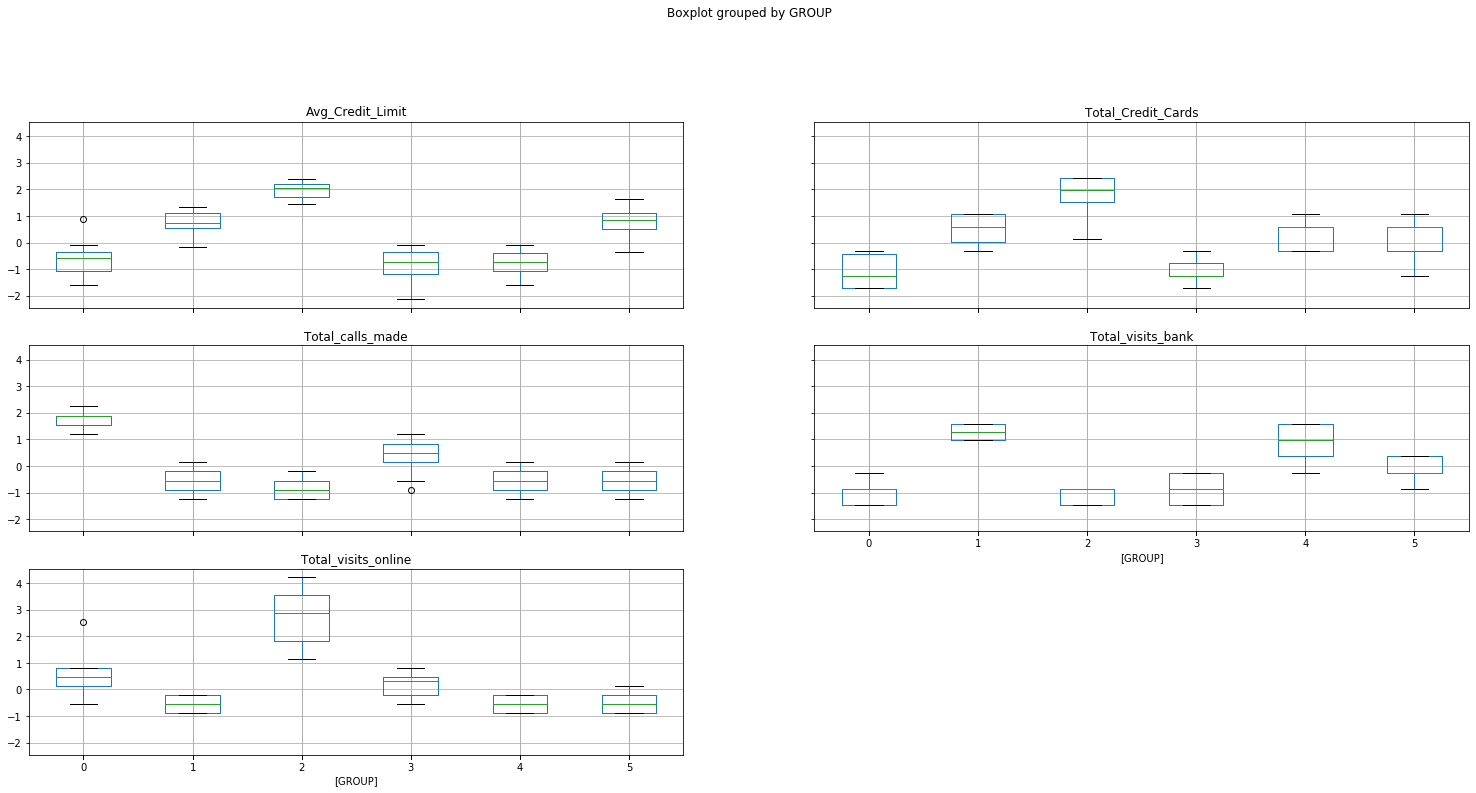

In [46]:
all_life_cc_df_req.boxplot(by='GROUP', layout = (5,2),figsize=(25,20))

#####  Group 0 is characterized by customers with lowest Ave Credit Limit, lowest total credit cards and lowest bank visits 
#####  Group 1 is characterized by customers with lowest Total Online Visits 
#####  Group 2 is characterized by customers with Highest Total Online Visits, Avg Credit Limit and  total credit cards and lowest bank visits 
#####  Group 3 is characterized by and lowest total Credit Cards, hightest  calls made, lowest visits to bank 
#####  Group 4 is characterized by customers with  lowest visits online 
#####  Group 5 is characterized by  customers with lowest visits online, less calls made but Highest visits to Bank


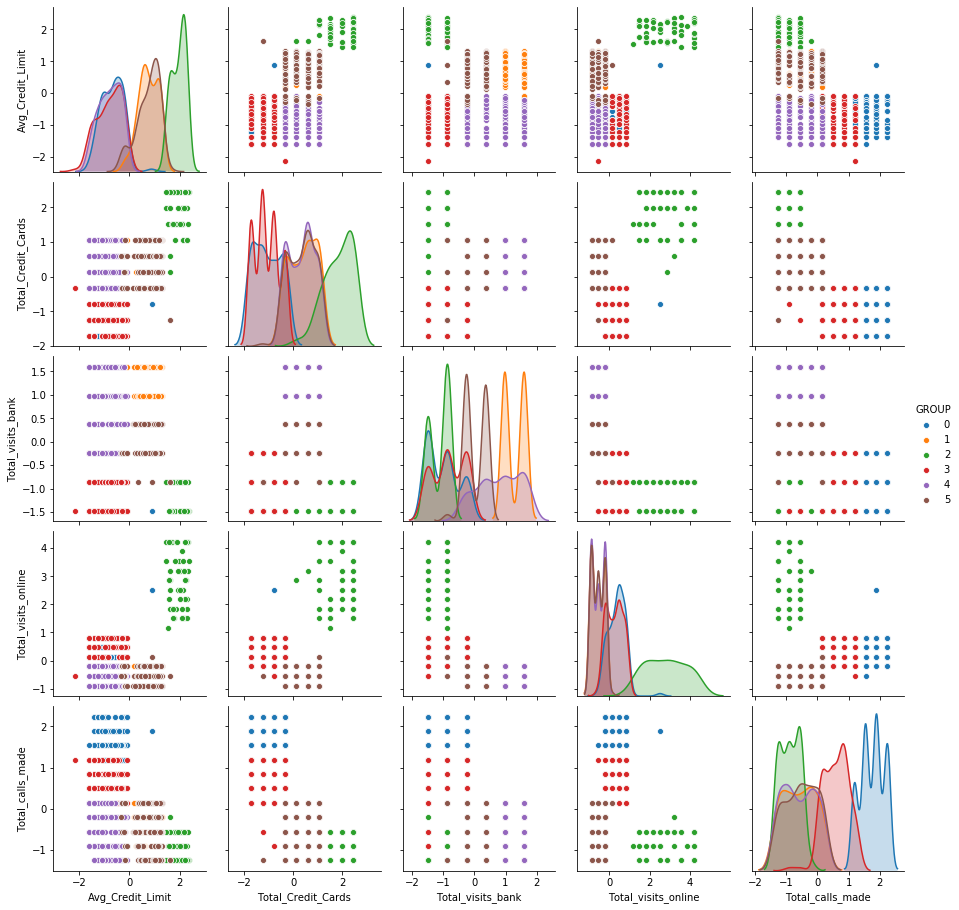

In [47]:
sns.pairplot(all_life_cc_df_req,hue="GROUP")

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,prediction)

0.5240666068759329

In [49]:
all_life_cc_df=all_life_cc_df.drop(columns=["GROUP"])

all_life_cc_df_req=all_life_cc_df_req.drop(['GROUP'], axis=1)

### Hierarchical Clustering

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist

##### find the cophenet correlation for different kinds of Linkage methods - with euclidean distance

In [51]:
links=['single','complete','average','ward','median']
for each in links:
    Z = linkage(all_life_cc_df_req, method=each, metric='euclidean')
    cc,cophn_dist=cophenet(Z,pdist(all_life_cc_df_req))
    print (each,cc)

single 0.6935695421676707
complete 0.8380834753160014
average 0.8692987148428343
ward 0.7464670063107975
median 0.8591211874947847


##### find the cophenet correlation for different kinds of Linkage methods - with chebyshev distance

In [52]:
links=['single','complete','average']
for each in links:
    Z = linkage(all_life_cc_df_req, method=each, metric='chebyshev')
    cc,cophn_dist=cophenet(Z,pdist(all_life_cc_df_req))
    print (each,cc)
            
                       

single 0.6672012519875145
complete 0.813126479497785
average 0.8679935550122012


##### find the cophenet correlation for different kinds of Linkage methods - with manhattan distance

In [53]:
#from sklearn.metrics.pairwise import manhattan
from sklearn.metrics import pairwise_distances
links=['single','complete','average']
for each in links:
    Z = linkage(all_life_cc_df_req, method=each, metric='cityblock')
    cc,cophn_dist=cophenet(Z,pdist(all_life_cc_df_req))
    print (each,cc)

single 0.7023309088302659
complete 0.8368054577189854
average 0.8691692578792812


##### From above, better cophenet correlation coeffienet is for Average linkage. Create the Hierarchical Clustering using Euclidena and Average linkage

In [54]:
#### generate the linkage matrix
Z = linkage(all_life_cc_df_req, 'average', metric='euclidean')
Z.shape


(659, 4)

#### Plot the dendrogram

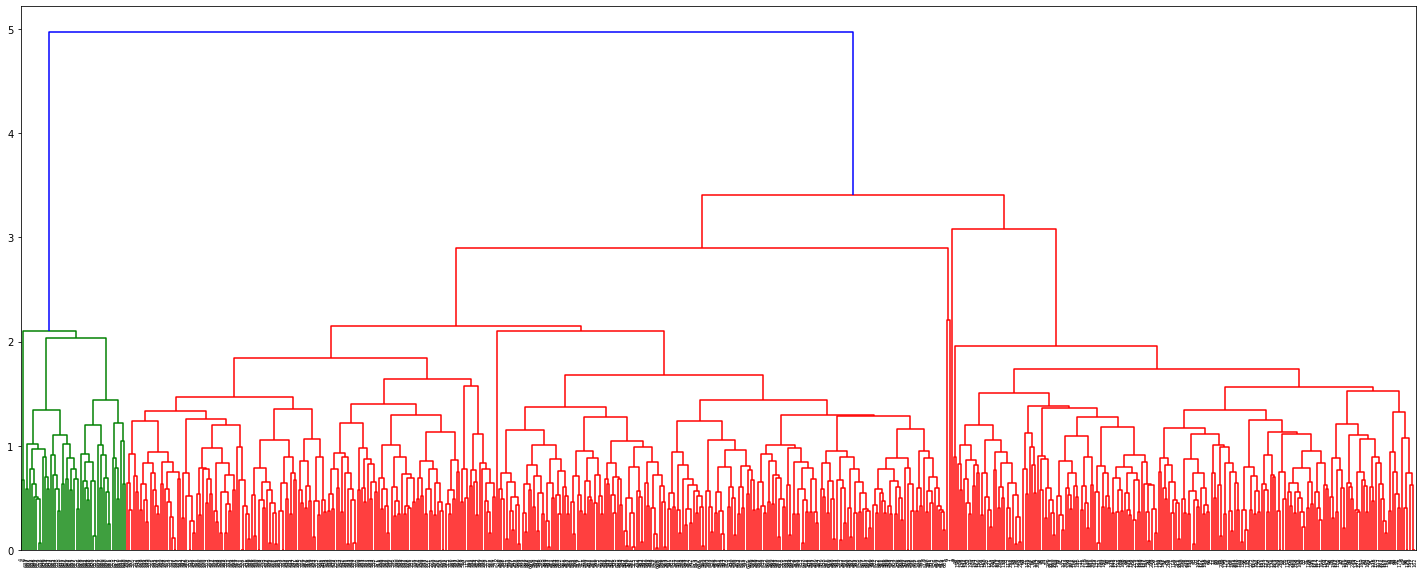

In [55]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

##### show only the last p merged clusters

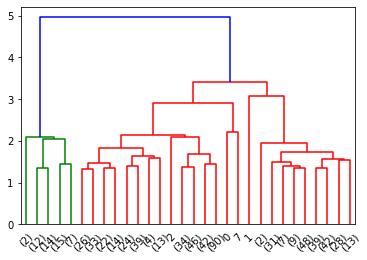

In [56]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
)
plt.show()

#### Use this distance measure(max_d) and fcluster function to cluster the data into 4 different groups¶

In [57]:
from scipy.cluster.hierarchy import fcluster
max_d =3
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2, 3, 4}

In [58]:
all_life_cc_df_req['cluster_label_avg']=clusters


In [59]:
all_life_cc_df_req.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_label_avg
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,4
2,0.885387,1.058973,-0.860451,0.134290,0.145528,2
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,2
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,1


In [60]:
all_life_cc_df_req.groupby(['cluster_label_avg']).size()

cluster_label_avg
1     50
2    390
3    219
4      1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE671FD908>,
      dtype=object)

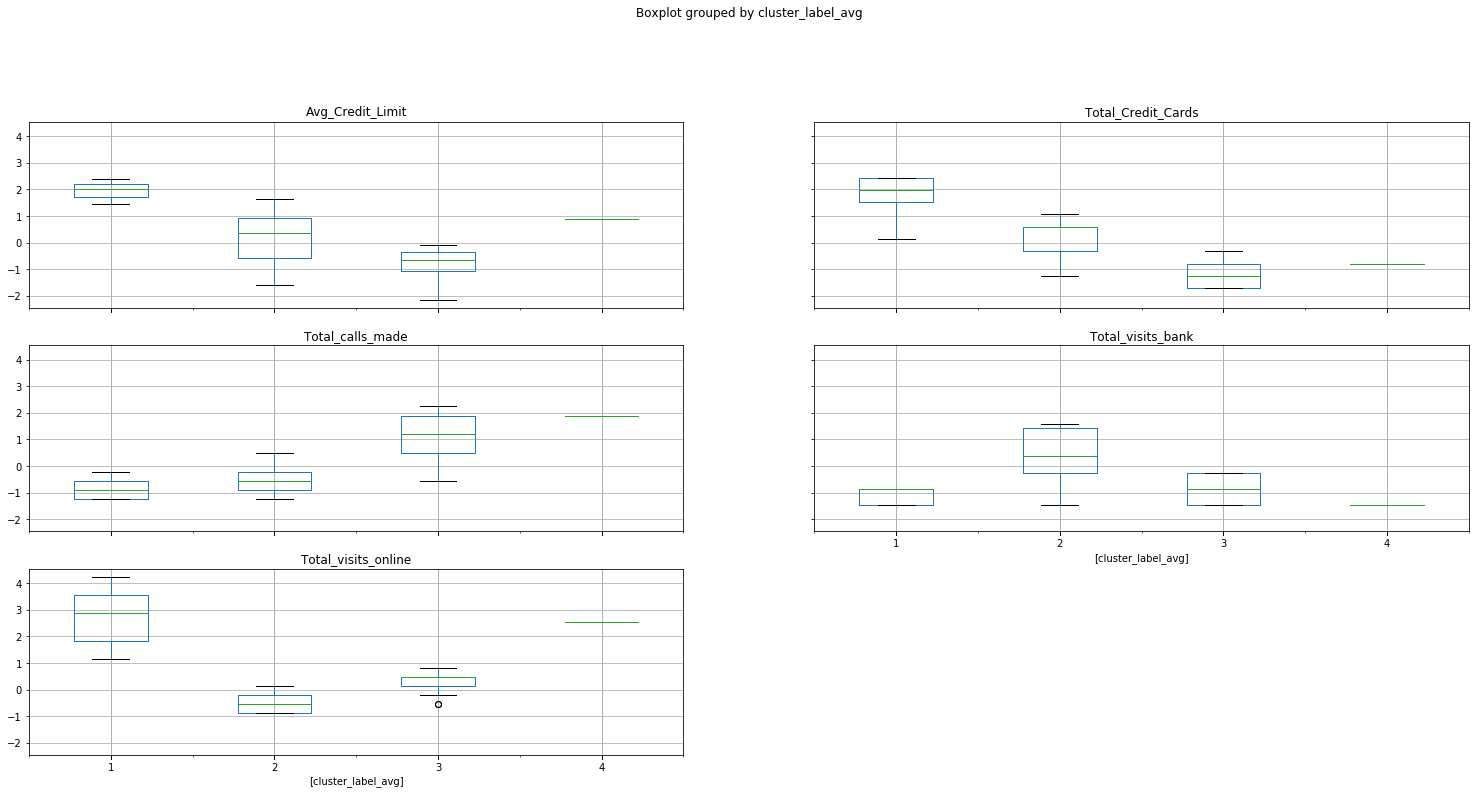

In [61]:
all_life_cc_df_req.boxplot(by='cluster_label_avg', layout = (5,2),figsize=(25,20))

#####  Calculate Avg Silhoutte Score

In [62]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,clusters)

0.49051789940877843

In [63]:
from scipy.cluster.hierarchy import fcluster
max_d =4
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2}

In [64]:
all_life_cc_df_req['cluster_label_avg']=clusters

In [65]:
all_life_cc_df_req.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_label_avg
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,2
2,0.885387,1.058973,-0.860451,0.134290,0.145528,2
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,2
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,1


In [66]:
all_life_cc_df_req.groupby(['cluster_label_avg']).size()

cluster_label_avg
1     50
2    610
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE695D0F88>,
      dtype=object)

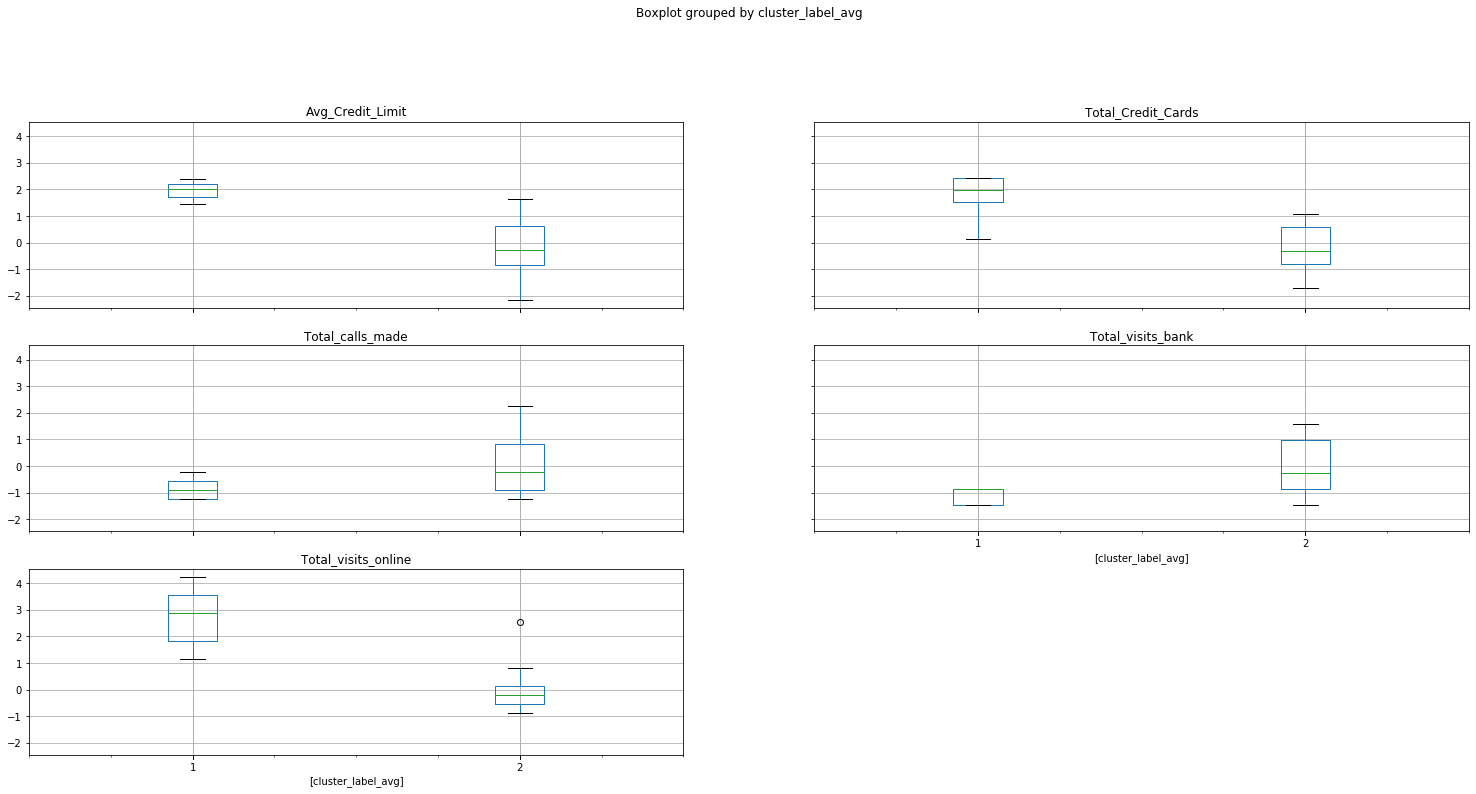

In [67]:
all_life_cc_df_req.boxplot(by='cluster_label_avg', layout = (5,2),figsize=(25,20))

#####  Group 0 is characterized by customers with Highest Ave Credit Limit, highest total credit cards and lowest bank visits and calls and highest Onine visits
#####  Group 1 is characterized by customers with lowest Ave Credit Limit, Lowest total credit cards, lowest online visits but more calls made and visits to bank


In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,clusters)

0.5114898798775744

##### Try with Manahattan method and   Average linkage

In [69]:
#### generate the linkage matrix
Z = linkage(all_life_cc_df_req, 'average', metric='cityblock')
Z.shape

(659, 4)

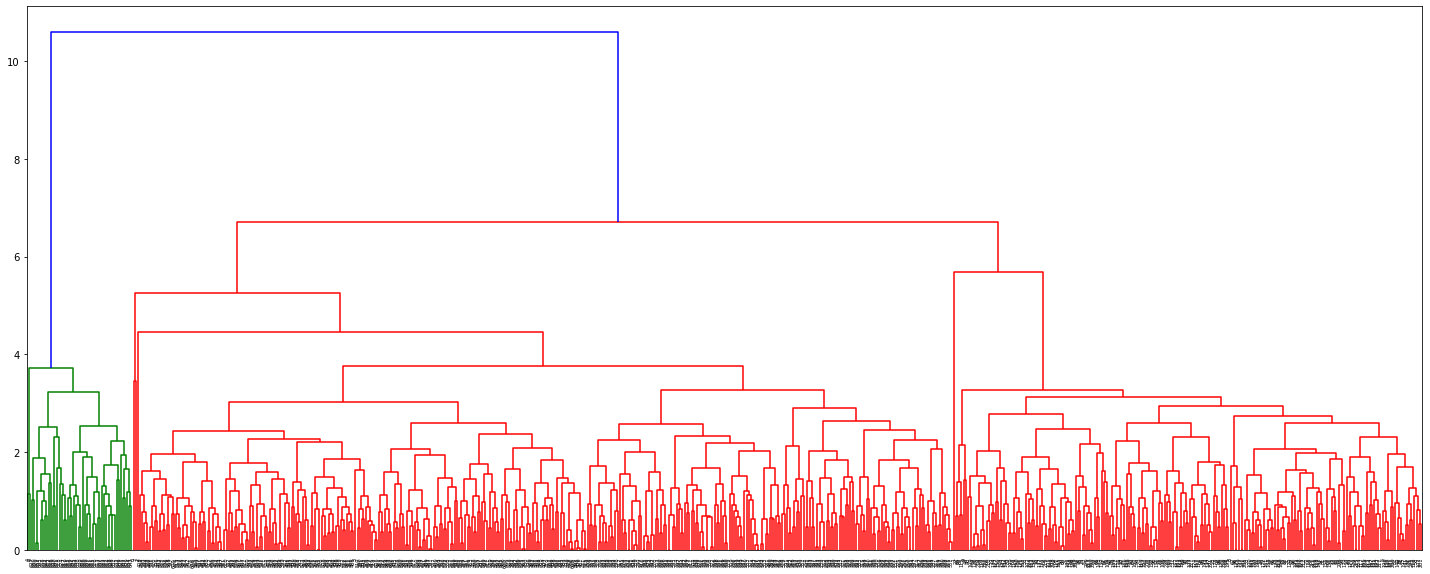

In [70]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

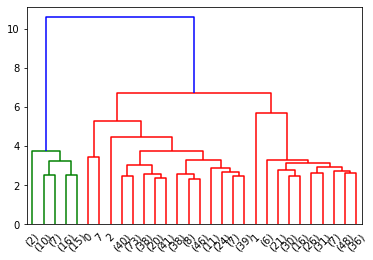

In [71]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
)
plt.show()

In [72]:
from scipy.cluster.hierarchy import fcluster
max_d =6
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2, 3}

In [73]:
all_life_cc_df_req['cluster_label_avg']=clusters

In [74]:
all_life_cc_df_req.groupby(['cluster_label_avg']).size()

cluster_label_avg
1     50
2    388
3    222
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE69FB3B08>,
      dtype=object)

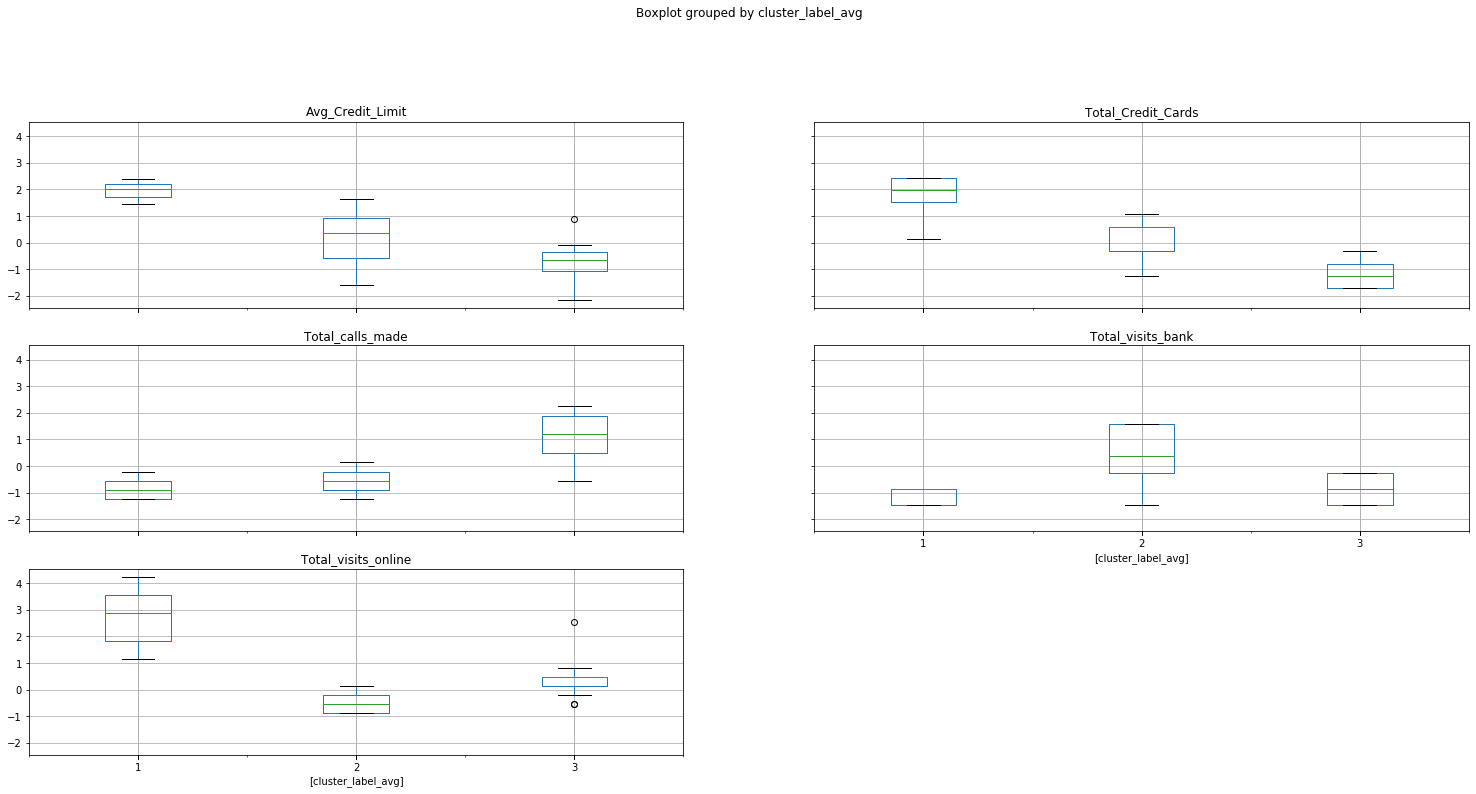

In [75]:
all_life_cc_df_req.boxplot(by='cluster_label_avg', layout = (5,2),figsize=(25,20))

#####  Calculate Avg Silhoutte Score

In [76]:
from sklearn.metrics import silhouette_score
silhouette_score(all_life_cc_df_req,clusters)

0.5158852415204072

In [77]:
from scipy.cluster.hierarchy import fcluster
max_d =9
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)

{1, 2}

In [78]:
all_life_cc_df_req['cluster_label_avg']=clusters

In [79]:
all_life_cc_df_req.groupby(['cluster_label_avg']).size()

cluster_label_avg
1     50
2    610
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE6671AF08>,
      dtype=object)

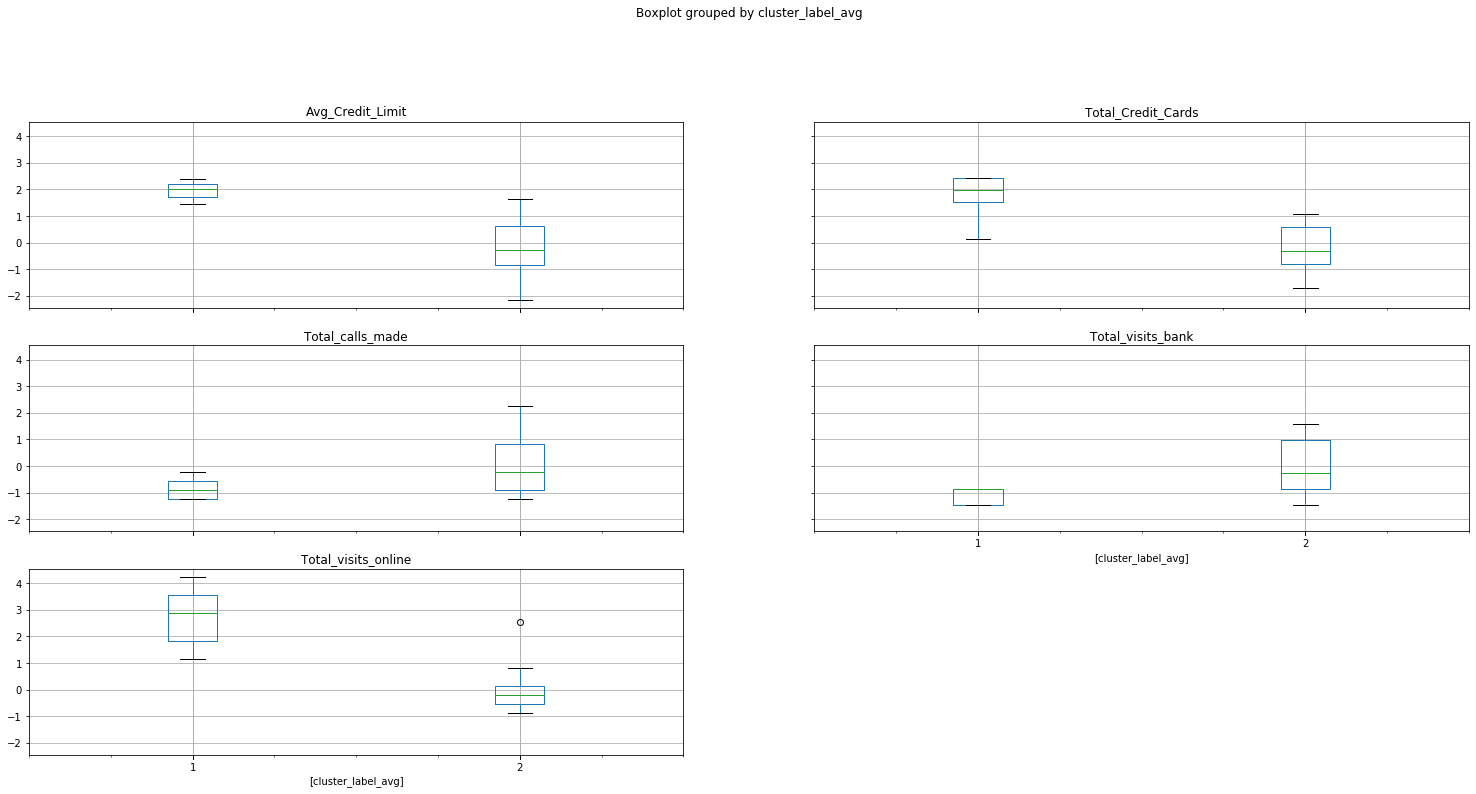

In [80]:
all_life_cc_df_req.boxplot(by='cluster_label_avg', layout = (5,2),figsize=(25,20))

#####  Group 0 is characterized by customers with Highest Ave Credit Limit, highest total credit cards and lowest bank visits and calls and highest Onine visits
#####  Group 1 is characterized by customers with lowest Ave Credit Limit, Lowest total credit cards, lowest online visits but more calls made and visits to bank

In [81]:
silhouette_score(all_life_cc_df_req,clusters)

0.5114898798775744

In [82]:
all_life_cc_df_req=all_life_cc_df_req.drop(['cluster_label_avg'], axis=1)

##### Clusters Comparision using Silhoutte Scores 

##### K Means - 3 Clusters - 0.516069861463629
##### K Means - 4 Clusters - 0.510369567232529
##### K Means - 5 Clusters - 0.4826104418816008
##### K Means - 6 Clusters - 0.5451358687749263
##### Hierarchial - Ecludiean - Average Linkage - 0.49051789940877843(with 4 clusters)
##### Hierarchial - Ecludiean - Average Linkage - 0.5114898798775744(with 2 clusters)
##### Hierarchial - Manhattan - Average Linkage - 0.49051789940877843( with 4 clusters)
##### Hierarchial - Manhattan - Average Linkage - 0.5114898798775744( with 2 clusters)

##### Clusters are considered well created when Silhoutte score is close to 1. for the given bank Data, we created mulitple cluster out of these K-Means with 6-clusters has better Silhoutte score so it can be conisered as better cluster here. however based on the Cluster ananlysis mentioned after each box plot Hierarchial Clusters providing more detail segmentaion.

##### for Bank to improve the service, it can focus on the Group-2, which are more dependent on Bank and calls. By providing more insight to these customers on Online Services bank can help them to get better services.

##### to increase the business, Group-0 can be focused as their spending capacity is more bank can expect more business from these segment.